# Furijeove transformacije $-$ obrada slike

In [1]:
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt

### PIL biblioteka

Na kursu ćemo za obradu slika koristiti Python biblioteku `PIL` i paket sa imenom `ndimage` biblioteke `scipy`. Funkcije ovih biblioteka omogućavaju razne manipulacije nad slikama poput rotacije, kropovanja, segmentacije, filtriranja, promene dimenzija i boja, i slično. 

In [2]:
from PIL import Image

Slika se u biblioteci `PIL` učitava pozivom funkcije `open`.

In [3]:
image = Image.open('data/slika.jpg')

Svojstvo `size` se koristi za očivatavanje dimenzija slike, svojstvo `format` za očitavanje formata slike, a svojstvo `filename` za očitavanje putanja slike.

In [4]:
image.size

(570, 407)

In [5]:
image.format

'JPEG'

In [6]:
image.filename

'data/slika.jpg'

Za prikaz slike koristi se funkcija `show`. Ona po pravilu otvara sliku u podrazumevanom programu za pregledanje slika.

In [7]:
image.show()

Na nivou biblioteke postoje mnoge zanimljive funkcije. Tako se, na primer, funkcija `rotate` može koristiti za rotaciju slika, funkcija `crop` za isecanje delova slika, a funkcija `resize` za promenu dimenzija slike.

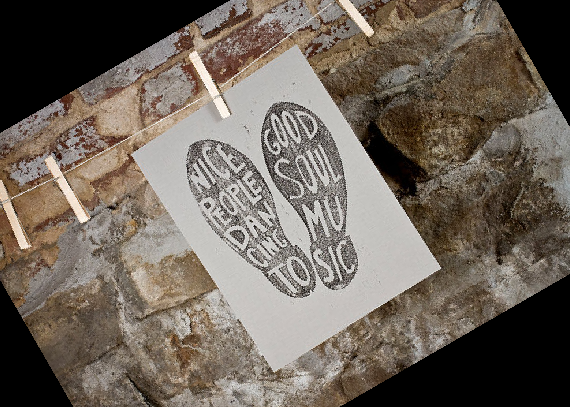

In [8]:
image.rotate(angle=30)

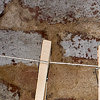

In [9]:
image.crop((0, 0, 100, 100))

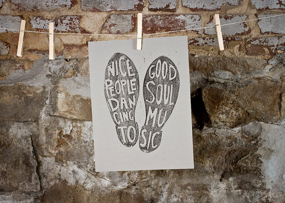

In [10]:
image.resize((285, 203))

U biblioteci PIL na raspolaganju su nam i mnogobrojne funkcije koje se koriste za obradu slika. Tako se, na primer, funkcijom `histogram` može dobiti histogram intenziteta piksela tj. histogram koji pokazuje broj piskela na slici za svaki od razlicitih intenziteta. Histogrami se koriste u analizi slika u zadacima kao sto su segmentacija slike ili detekcija ivica. 

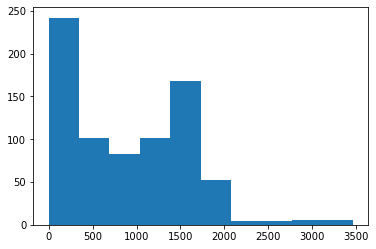

In [11]:
plt.hist(image.histogram())
plt.show()

Slike se mogu transformisati i u nizove tipa *ndarray*. Ovakve transformacije će nam biti zgodne zbog direktnog rada sa matricama piksela. 

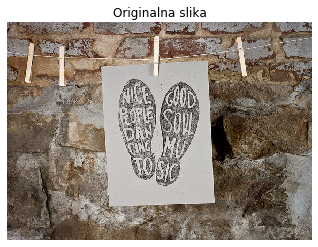

In [12]:
img = np.array(image)
plt.imshow(img)
plt.axis('off')
plt.title('Originalna slika')
plt.show()

Za prikaz slike iskorišćena je funkcija `imshow` biblioteke `matplotlib`. Podeone skale duž osa su obrisane pozivom funkcije `axis('off')`.

Proverimo dimenzije ovako dobijene slike.

In [13]:
img.shape

(407, 570, 3)

Primećujemo da slika ima tri kanala jer se radio o RGB slici pa za svaki piksel imamo informaciju o zastupljenosti crvene, zelene i plave boje. Furijeovu transformaciju možemo primeniti nad pojedinačnim slojevima slike ili nad slikom koja je konvertovana u monohromatsku. Za dobijanje pojedinačnih slojeva se koristi funkcija `getchannel`, a konvertovanje slike u monohromatsku funkcija `convert` sa parametrom `L`.

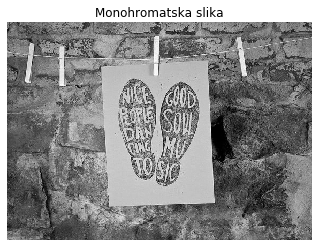

In [14]:
img = np.array(image.convert('L'))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Monohromatska slika')
plt.show()

### 2D Furijeova transformacija

Kada se koristi u obradi slika, Furijeova transformacija se definiše u dve dimenzije. Odgovarajući obrazac za neprekidnu funkciju se proširuje i sadrži dvostruki integral, a kod diskretnog slučaja, radi se o dvostrukoj sumi. Ako je polazište realna matrica $[f_{jk}]$ dimenzija $P \times Q$, tada matrica $[\hat{f}_{lm}]$ istih dimenzija predstavlja diskretnu Furijeovu transformaciju polazne matrice gde važi $$\hat{f}_{lm} = \frac{1}{PQ} \sum_{j=0}^{P-1} \sum_{k=0}^{Q-1} f_{jk} e^{2\pi i (\frac{jl}{P} + \frac{km}{Q})}.$$ 

Inverzna diskretna Furijeova transformacija u dve dimenzije je data sa $$ f_{jk} = \sum_{l=0}^{P-1} \sum_{m=0}^{Q-1} \hat{f}_{lm} e^{-2\pi i (\frac{jl}{P} + \frac{km}{Q})}.$$

Furijeova transformacija u dve dimenzije podržana je bibliotečkom funkcijom `fft2`, a inverzna Furijeova transformacija funkcijom `ifft2`. 

In [15]:
c = fft.fft2(img)

Furijeova transformacija polazne slike je matrica kompleksnih vrednosti istih dimenzija kao i slika.

In [16]:
type(c)

numpy.ndarray

In [17]:
c.shape

(407, 570)

I u obradi slika u frekvencijskom domenu pratimo `spektar magnituda` i `spektar faza`.

Za spektar magnituda se, po pravilu, koristi logaritamska skala. Vrednosti koje su svetlije odgovaraju većim magnitudama, a tamnije manjim.

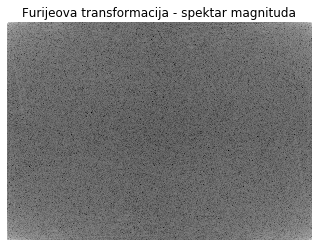

In [18]:
plt.imshow(np.log(np.abs(c)), cmap='gray')
plt.title('Furijeova transformacija - spektar magnituda')
plt.axis('off')
plt.show()

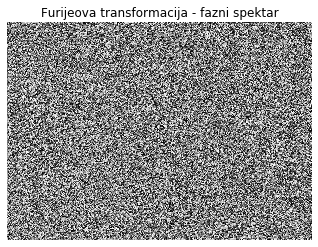

In [19]:
plt.imshow(np.angle(c), cmap='gray')
plt.title('Furijeova transformacija - fazni spektar')
plt.axis('off')
plt.show()

Da bismo dobili frekvencije frekvencijskog domena za jednodimenzione signale koristili smo funkciju `fftfreq`. Ova funkcija je generisala niz frekvencija tako što je na početku niza postavljala nultu frekvenciju, zatim pozitivne, a potom i negativne frekvencije. Za raspoređivanje ovih frekvencija u rastući poredak može se koristiti funkcija `fftshift`. 

In [20]:
example_freq = np.fft.fftfreq(10, 1.0/10)
example_freq_shifted = np.fft.fftshift(example_freq)

print('Polazne frekvencije:', example_freq)
print('Siftovane frekvencije:', example_freq_shifted)

Polazne frekvencije: [ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
Siftovane frekvencije: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


Ovo zapažanje važi i za dvodimenzione signale. Funkcija `fftshift` pomera nultu frekvenciju u centar, a ostale preraspoređuje tako da se manje frekvencije nalaze oko centra spektra, a veće bliže ivicama. Funkcija `ifftshift` vraća frekvencije u polazni poredak.

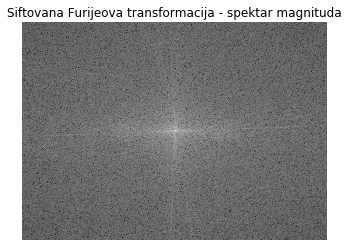

In [21]:
c = fft.fft2(img)
c_shifted = fft.fftshift(c)
plt.imshow(np.log(np.abs(c_shifted)), cmap='gray')
plt.title('Siftovana Furijeova transformacija - spektar magnituda')
plt.axis('off')
plt.show()

Ovakva forma spektra magnituda je podesnija za obradu slika. 

### Zamućivanje slike

Za zamućivanje slike potrebno je odseći visoke frekvencije prisutne u slici. Ukoliko govorimo sa aspekta šiftovanog Furijeovog spektra, visoke frekvencije se nalaze duž rubova. Stoga ovaj efekat možemo postići tako što ćemo napraviti masku koja predstavlja binarnu matricu istih dimenzija kao polazna slika u kojoj će nula označavati frekvencije koje želimo da elminišemo, a jedinica frekvencije koje želimo da zadržimo. Možemo odabrati kvadrat pogodno izabranih dimenzija čiji se centar nalazi u centru slike čije ćemo elemente postaviti na vrednost `1`, a sve druge elemente maske postaviti na `0`. 

In [22]:
mask = np.zeros(img.shape)

# centar kvadrata sa jedinicama
x_center = img.shape[0] // 2
y_center = img.shape[1] // 2

# duzina stranice kvadrata sa jedinicama je 2*nb_ones
nb_ones = 50

mask[x_center-nb_ones : x_center+nb_ones, y_center-nb_ones : y_center+nb_ones] = 1

Masku možemo i prikazati korišćenjem funkcije `imshow`: beli kvadrat je blok jedinica.

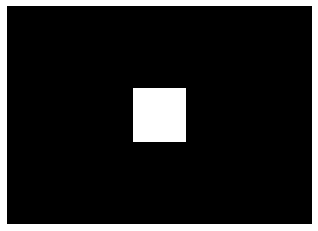

In [23]:
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

Množenjem elemenata šiftovanog Furijeovog spektra i maske biće sačuvani jedino elementi koji se nalaze u centralnom kvadratu tj. koji su nižih frekvencija.

In [24]:
c_shifted_filtered = c_shifted * mask
c_filtered = fft.ifftshift(c_shifted_filtered)
c_final = fft.ifft2(c_filtered)

Rezultujuća slika je zamućena. Baš kao i u slučaju jednodimenzionih signala, prilikom vizuelizacije rezultata inverzne Furijeove transformacije, zainteresovani smo samo za module dobijenih koeficijenata. 

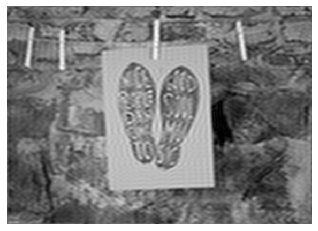

In [25]:
plt.imshow(np.abs(c_final), cmap='gray')
plt.axis('off')
plt.show()

Za veće vrednosti parametra `nb_ones` zamućenje je manje, i obrnuto, za manje vrednosti parametra `nb_ones` zamućenje je veće.

Dobijenu sliku možemo i sačuvati pozivom funkcije `fromarray`. Pošto su dobijene vrednosti realni brojevi ('F' mod), pre čuvanja slike moramo je konvertovati u monohromatsku ('L' mod).

In [26]:
blured_image = Image.fromarray(np.abs(c_final))
blured_image.convert('L').save('zamucena_slika.jpg')

### Određivanje kontura slike

Za određivanje kontura na slici potrebno je odseći niske frekvencije spektra. Primenićemo isti postupak kao kod zamućivanja slike kreiranjem kvadratne maske s tim što ćemo ovde imati vrednosti `0` van pravougaonika, a unutar njega vrednosti `1`.

In [27]:
mask = np.ones(img.shape)

# centar kvadrata sa nulama
x_center = img.shape[0] // 2
y_center = img.shape[1] // 2

# duzina stranice kvadrata sa nulama je 2*nb_zeros
nb_zeros = 50

mask[x_center-nb_zeros : x_center+nb_zeros, y_center-nb_zeros : y_center+nb_zeros] = 0

Masku možemo i prikazati korišćenjem funkcije `imshow`: crni kvadrat je blok nula.

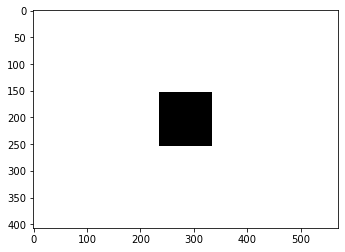

In [28]:
plt.imshow(mask, cmap='gray')
# ose necemo obrisati da bi se videla kontura maske
#plt.axis('off')
plt.show()

Rezultujuća slika ima istaknute ivice.

In [29]:
c_shifted_filtered = c_shifted * mask
c_filtered = fft.ifftshift(c_shifted_filtered)
c_final = fft.ifft2(c_filtered)

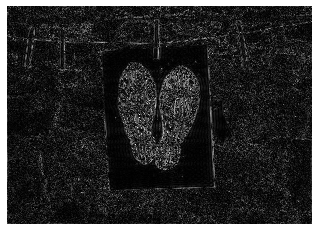

In [30]:
plt.imshow(np.abs(c_final), cmap='gray')
plt.axis('off')
plt.show()

I ovako dobijenu sliku možemo sačuvati.

In [31]:
img_edges = Image.fromarray(np.abs(c_final))
img_edges.convert('L').save('slika_sa_konturama.jpg')